I was working on the exercises with Luc Testa.

- In case of the logistic regression model the dependent variable has to be categorical (f.e yes or no). In case of linear regression, the dependent variable can change continiuously.

In [1]:
%config InlineBackend.figure_format='retina'
%matplotlib inline

import numpy as np
np.random.seed(123)
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (8, 8)
plt.rcParams["font.size"] = 14
from sklearn.utils import check_random_state

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

def make_two_blobs(n_samples=400, cluster_std=2., random_state=42):
    rng = check_random_state(random_state)
    X = rng.multivariate_normal([5,0], [[cluster_std**2, 0], [0., cluster_std**2]],
                                size=n_samples//2)
    
    X2 = rng.multivariate_normal([0, 5.], [[cluster_std**2, 0], [0., cluster_std**2]],
                                 size=n_samples//2)
    X = np.vstack((X, X2))
    return X, np.hstack((np.ones(n_samples//2), np.zeros(n_samples//2)))

X, y = make_two_blobs()
labels = ['b', 'r']
y = np.take(labels, (y < 0.5))

Plotting data with drawing the line where we guess to cut it. We chose this one, based on our brain's pattern recognition.

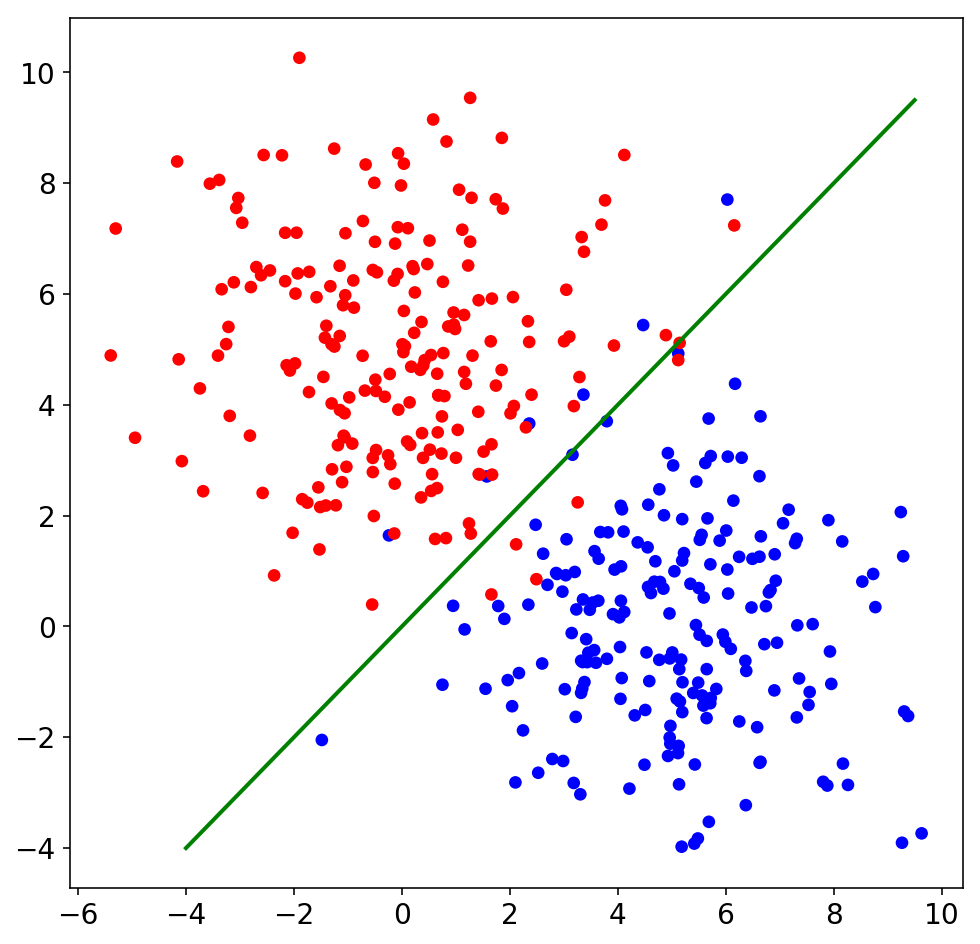

In [7]:
my_draw = np.arange(-4,10,0.5)
plt.scatter(X[:,0], X[:,1], c=y, lw=0, s=40)
plt.plot(my_draw, my_draw, c='g',lw=2)

In [4]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.5)

Use the Logistic regression now.

In [33]:
lgc = LogisticRegression()
lgc.fit(X_train, y_train)
print("Coefficients: ")
print(" 1) %.4f" % lgc.coef_[0][0])
print(" 2) %.4f" % lgc.coef_[0][1])

print("\n Interception:")
print("%.4f" % lgc.intercept_)

Coefficients: 
 1) -1.3523
 2) 1.3288

 Interception:
0.3547


The logistic regression allows one to classify new samples based on an arbitrary threshold, therefore it doesnâ€™t inherently have one decision boundary. But a common decision rule is to use p=0.5.

I will plot the decision surface, then the decision boundary.

In [34]:
xx, yy = np.mgrid[-6:10:.01, -4:11:.01]
grid = np.c_[xx.ravel(), yy.ravel()]
probs = lgc.predict_proba(grid)[:, 1].reshape(xx.shape)

[(-4, 11),
 (-6, 10),
 None]

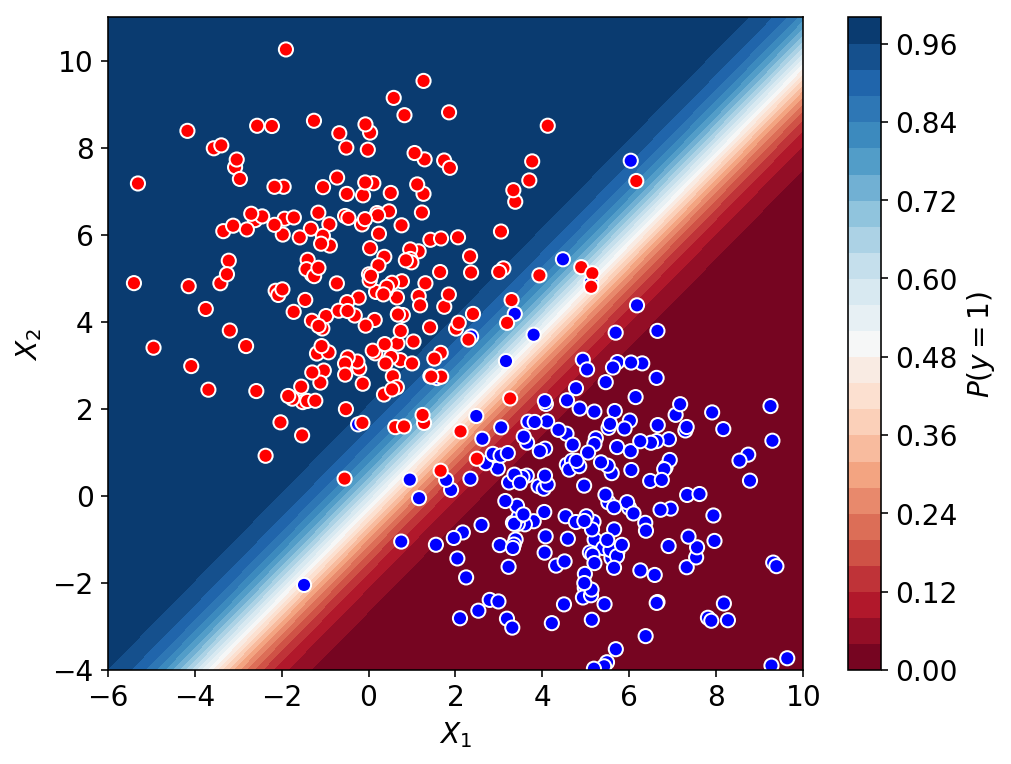

In [35]:
f, ax = plt.subplots(figsize=(8, 6))
contour = ax.contourf(xx, yy, probs, 25, cmap="RdBu",
                      vmin=0, vmax=1)
ax_c = f.colorbar(contour)
ax_c.set_label("$P(y = 1)$")

ax.scatter(X[:,0], X[:, 1], c=y, s=50,
           cmap="RdBu", vmin=-.2, vmax=1.2,
           edgecolor="white", linewidth=1)

ax.set(aspect="equal",
       xlim=(-6, 10), ylim=(-4, 11),
       xlabel="$X_1$", ylabel="$X_2$")

[(-4, 11),
 (-6, 10),
 None]

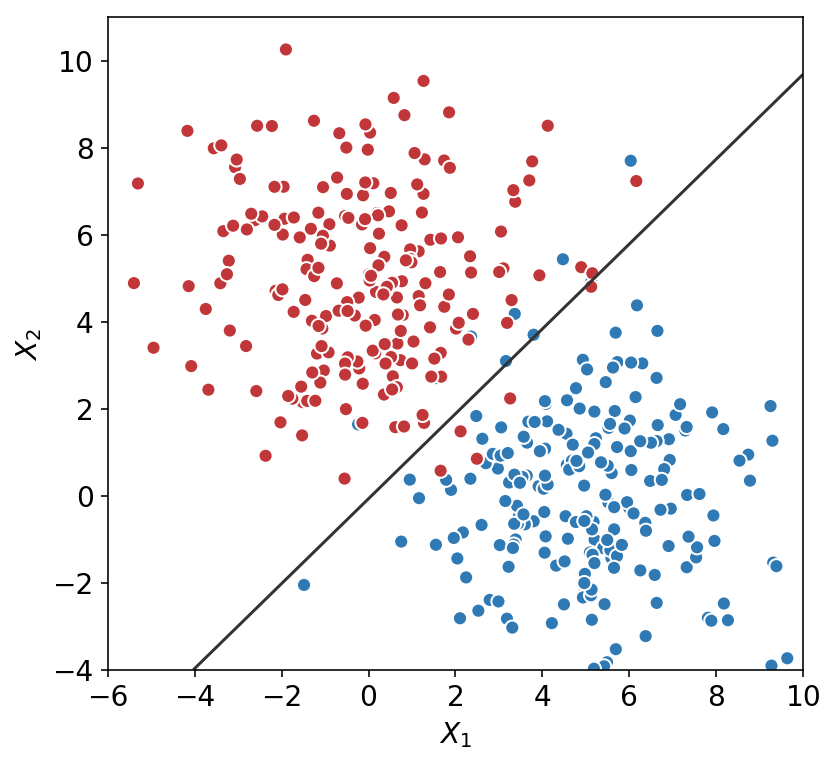

In [54]:
f, ax = plt.subplots(figsize=(8, 6))
ax.contour(xx, yy, probs, levels=[.5], cmap="Greys", vmin=0, vmax=.6)

ax.scatter(X[:,0], X[:, 1], c=y, s=50,
           cmap="RdBu", vmin=-.2, vmax=1.2,
           edgecolor="white", linewidth=1)

ax.set(aspect="equal",
       xlim=(-6, 10), ylim=(-4, 11),
       xlabel="$X_1$", ylabel="$X_2$")

Creating 20 new datasets, and visualizing the results.

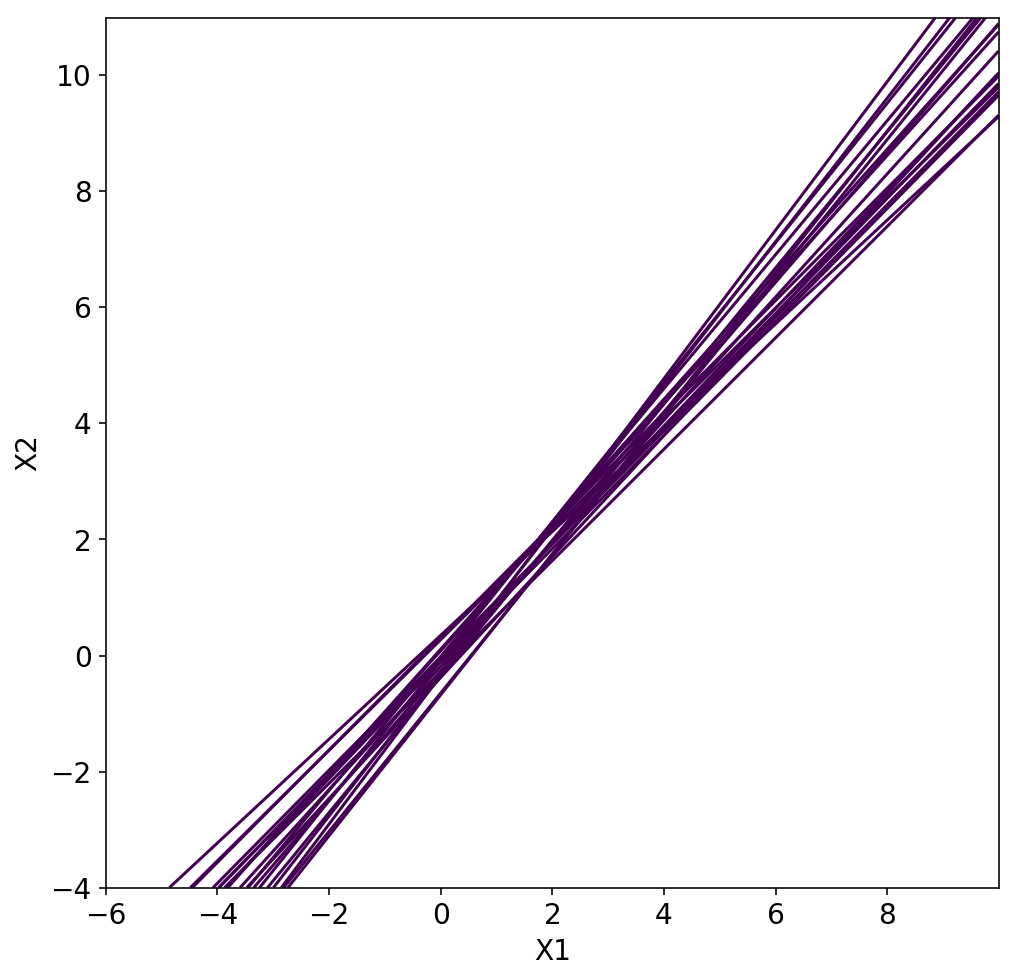

In [56]:
coeff1 = []
coeff2 = []
inter = []
models = np.arange(1,21,1)

xx, yy = np.mgrid[-6:10:.01, -4:11:.01]
grid = np.c_[xx.ravel(), yy.ravel()]

for n in models:
    X, y = make_two_blobs(n_samples=400, cluster_std=2., random_state=42)
    X_train,X_test, y_train,y_test = train_test_split(X, y, train_size=0.6)
    
    rgr = LogisticRegression()
    rgr.fit(X_train, y_train)
    coeff1.append(rgr.coef_[0][0])
    coeff2.append(rgr.coef_[0][1])
    inter.append(rgr.intercept_)
    
    probs = rgr.predict_proba(grid)[:, 1].reshape(xx.shape)
    plt.contour(xx, yy, probs, levels=[.5])
    
plt.xlabel('X1')
plt.ylabel('X2')
    

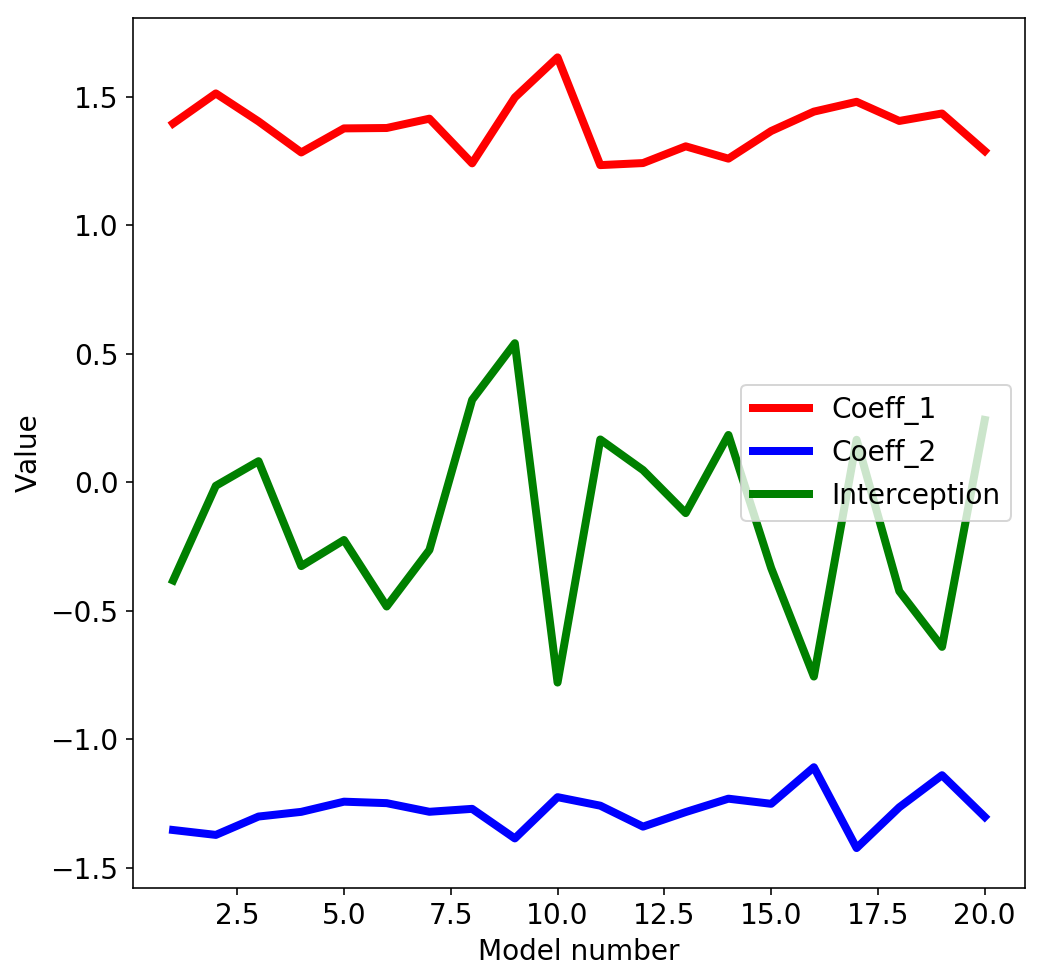

In [39]:
plt.plot(models, coeff1, label='Coeff_1', c='r', lw=4)
plt.plot(models, coeff2, label='Coeff_2', c='b', lw=4)
plt.plot(models, inter, label='Interception', c='g', lw=4)
plt.xlabel('Model number')
plt.ylabel('Value')
plt.legend(loc='best')